In [7]:
#### Dieu
import pandas as pd 
import numpy as np 
#### Plotting
import seaborn as sns
import matplotlib.pyplot as plt
#### Sklearn
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_validate

In [8]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 1. Réaliser l'analyse exploratoire des données

In [12]:

########### Cleaning data and save it in new_csv

# df1 = df0.drop(columns=['id','Unnamed: 32'])
# df1['diagnosis_bool'] = df1['diagnosis'].replace({'M':0, 'B':1}) 
# df2 = df1.drop(columns=['diagnosis'])
# df2.to_csv('dataset_cleaned.csv')

# df3 = df1.copy()
# median_col = df3.median(axis = 1,skipna = True)
# df3 = df3.fillna(median_col) 
# df3

### 5. Feature engineering (Ingénierie des fonctionnalités)
### 3. Déclarer le vecteur de caractéristiques et la variable cible

In [15]:
###### Loading cleaned data wich is diagnosis_bool , unamed delete 
df0 = pd.read_csv('../data/dataset_cleaned.csv')
df_median = df0.copy()
###### Copying dataframe raw and calculatin median 
median_col = df_median.median(axis = 1,skipna = True)
###### Selecting Targets and Data making training and testing test model
# df0.loc[:, df.columns != 'diagnosis_bool'] ###### Selectin all dataframe expecting one col
data = df_median.loc[:, df_median.columns != 'diagnosis_bool']
targets = df0['diagnosis_bool']

### 2. Visualiser les données

In [16]:
matrice_corr = data.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.0,0.341,0.998,1.0,0.149,0.498,0.646,0.76,0.12,-0.35,0.55,-0.144,0.566,0.738,-0.326,0.265,0.365,0.411,-0.241,-0.00841,0.979,0.315,0.972,0.979,0.126,0.491,0.596,0.727,0.175,0.0446
texture_mean,0.341,1.0,0.348,0.344,0.0246,0.266,0.343,0.307,0.11,-0.0593,0.364,0.451,0.387,0.395,0.037,0.264,0.287,0.239,0.00895,0.148,0.367,0.909,0.375,0.368,0.101,0.291,0.34,0.319,0.121,0.116
perimeter_mean,0.998,0.348,1.0,0.997,0.183,0.544,0.682,0.789,0.15,-0.305,0.56,-0.138,0.583,0.746,-0.311,0.309,0.402,0.442,-0.228,0.0324,0.981,0.323,0.979,0.981,0.157,0.535,0.632,0.758,0.199,0.089
area_mean,1.0,0.344,0.997,1.0,0.138,0.489,0.643,0.755,0.114,-0.358,0.553,-0.142,0.568,0.742,-0.327,0.26,0.362,0.406,-0.244,-0.0127,0.979,0.318,0.972,0.98,0.12,0.486,0.594,0.723,0.171,0.0388
smoothness_mean,0.149,0.0246,0.183,0.138,1.0,0.679,0.519,0.565,0.542,0.588,0.334,0.0913,0.331,0.296,0.339,0.392,0.355,0.439,0.151,0.413,0.203,0.0606,0.226,0.192,0.796,0.481,0.429,0.499,0.394,0.511
compactness_mean,0.498,0.266,0.544,0.489,0.679,1.0,0.897,0.848,0.552,0.499,0.507,0.0478,0.584,0.54,0.127,0.818,0.772,0.732,0.0984,0.621,0.543,0.255,0.592,0.532,0.579,0.901,0.838,0.825,0.45,0.689
concavity_mean,0.646,0.343,0.682,0.643,0.519,0.897,1.0,0.927,0.447,0.258,0.575,0.0513,0.646,0.644,0.0703,0.761,0.858,0.775,0.0228,0.514,0.682,0.336,0.722,0.677,0.489,0.85,0.939,0.905,0.384,0.542
concave points_mean,0.76,0.307,0.789,0.755,0.565,0.848,0.927,1.0,0.424,0.143,0.635,0.00871,0.68,0.727,0.0168,0.608,0.675,0.758,-0.0284,0.378,0.787,0.301,0.814,0.78,0.49,0.758,0.827,0.937,0.355,0.421
symmetry_mean,0.12,0.11,0.15,0.114,0.542,0.552,0.447,0.424,1.0,0.428,0.338,0.139,0.355,0.288,0.206,0.436,0.368,0.383,0.384,0.403,0.165,0.119,0.191,0.154,0.424,0.441,0.394,0.397,0.71,0.41
fractal_dimension_mean,-0.35,-0.0593,-0.305,-0.358,0.588,0.499,0.258,0.143,0.428,1.0,0.00148,0.157,0.0553,-0.12,0.402,0.481,0.344,0.286,0.314,0.684,-0.295,-0.0478,-0.247,-0.305,0.493,0.404,0.243,0.139,0.295,0.761


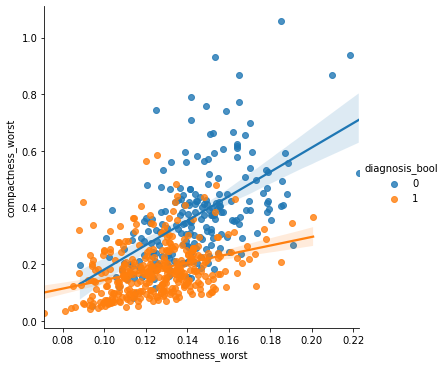

In [17]:
sns.lmplot(x ='smoothness_worst', y = 'compactness_worst', data = df0, hue = 'diagnosis_bool')

### 4.Divisez les données en un ensemble d'entraînement et de test séparé

In [18]:
###### Selecting Targets and Data making training and testing test model
# df0.loc[:, df.columns != 'diagnosis_bool'] ###### Selectin all dataframe expecting one col
data = df_median.loc[:, df_median.columns != 'diagnosis_bool']
targets = df0['diagnosis_bool']

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.25, random_state=8)


### 6.Feature scaling
### 7.Ajuster le classificateur à l'ensemble d'entraînement

In [19]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(scaled_X_train, y_train)


KNeighborsClassifier(n_neighbors=13)

### 8.Prédire les résultats du test (predict() et predict_proba())

In [20]:
y_pred = knn.predict(scaled_X_test)
y_pred_proba = knn.predict_proba(scaled_X_test)

### 9.Vérifiez le score de précision :
### 12.Métriques de classification.

In [21]:
print("Y_prediction:",y_pred[:30])
print(metrics.classification_report(y_test, y_pred))

print(pd.DataFrame(data=y_pred_proba, columns=['M','B']))

Y_prediction: [1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.96      1.00      0.98        85

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

            M         B
0    0.000000  1.000000
1    0.000000  1.000000
2    0.000000  1.000000
3    0.000000  1.000000
4    0.000000  1.000000
..        ...       ...
138  0.384615  0.615385
139  0.153846  0.846154
140  0.615385  0.384615
141  1.000000  0.000000
142  1.000000  0.000000

[143 rows x 2 columns]


In [22]:
### source : https://www.ritchieng.com/machine-learning-evaluate-classification-model/

# examine the class distribution of the testing set (using a Pandas Series method)
print("Examine the class distribution:","\n",y_test.value_counts())

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("calculate the percentage of ones:",y_test.mean(),"\n")

# calculate the percentage of zeros
print("calculate the percentage of zeros:",1 - y_test.mean(),"\n")

# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
print("calculate null accuracy:",max(y_test.mean(), 1 - y_test.mean()),"\n")

# calculate null accuracy (for multi-class classification problems)
print("calculate null accuracy :",y_test.value_counts().head(1) / len(y_test),"\n")

# print the first 70 true and predicted responses
print("Print the first 70 true and predicted responses:")

ouiooo =pd.DataFrame({'True': y_test.values[0:70], 'False': y_pred[0:70]})
ouiooo

Examine the class distribution: 
 1    85
0    58
Name: diagnosis_bool, dtype: int64
calculate the percentage of ones: 0.5944055944055944 

calculate the percentage of zeros: 0.4055944055944056 

calculate null accuracy: 0.5944055944055944 

calculate null accuracy : 1    0.594406
Name: diagnosis_bool, dtype: float64 

Print the first 70 true and predicted responses:


,True,False
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
65,1,1
66,1,1
67,0,0
68,1,1


### 11.Matrice de confusion.

[[54  4]
 [ 0 85]]


<AxesSubplot:>

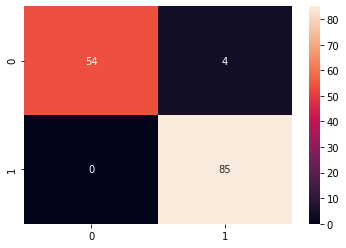

In [23]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)


<AxesSubplot:>

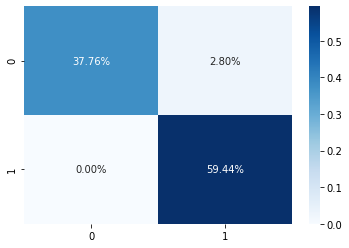

In [24]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

###  13.ROC - AUC.

AUC: 0.99


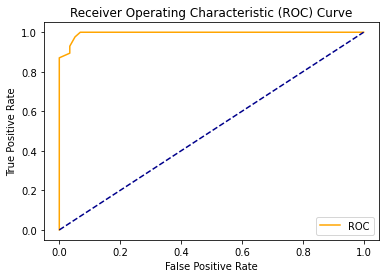

In [25]:
preds = y_pred_proba[:,1]

auc = roc_auc_score(y_test, preds)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, preds)

plot_roc_curve(fpr, tpr)


### 14.Utiliser la validation croisée K-Fold 

In [45]:
kf = KFold(n_splits=5, random_state=None, shuffle=False)
scores = []
for train_index, test_index in kf.split(df0):
          X_train, X_test = data.loc[train_index], data.loc[test_index]
          y_train, y_test = targets.loc[train_index], targets.loc[test_index]
          knn.fit(X_train, y_train)
          pred = knn.predict(X_test)
          #scores.append(f1_score(y_test,pred))
          scores.append(metrics.accuracy_score(y_test, pred))
std = round(np.std(scores),3)
np.mean(scores)

0.912187548517311

### 14.2 Utiliser la validation croisée autre K-fold

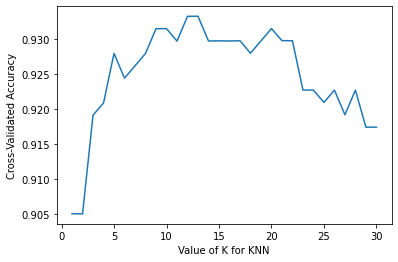

In [27]:
#### source : https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4

# choose k between 1 to 31
k_range = range(1, 31)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, data, targets, cv=5, scoring='accuracy')
    ls_scores = list(scores.items())
    oui = ls_scores[2]
    non = oui[1]    
    k_scores.append(non.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 15.Résultats et conclusion

### 16.Bonus : Implémenter votre propre algorithme KNN. 

In [28]:
class KNN():
  def __init__(self,k):
    self.k=k
    print(self.k)

  def fit(self,X_train,y_train):
    self.x_train=X_train
    self.y_train=y_train

  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
    return sqrt(distance)

  def nearest_neighbors(self,test_sample):
    distances=[]#calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get first k samples
      neighbors.append(distances[i][0])
    return neighbors
    
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neighbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

### 17. Bonus 2 : Comparer les résultats avec un autre algorithme de classification